<a href="https://colab.research.google.com/github/Joao-Tolentino/lia1_2024_1/blob/main/Entregas-Joao-Tolentino/Modelo_CIFAR100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIFAR100
Recebe uma imagem e a classifica como um número;
Cada número é relativo a uma Superclasse e uma subclasse, um nível abaixo do anterior, esse dataset é usadoo para categorizar imagens dentro dessas Superclasses e Subclasses

In [49]:
#Importando Bibliotecas
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical, get_file
import numpy as np
import matplotlib.pyplot as plt
import json
from PIL import Image

# Carregando o CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Carregando as labels das superclasses do CIFAR-100
(_, y_train_superclass), (x_test_superclass, y_test_superclass) = cifar100.load_data(label_mode='coarse')

# Carregando as labels do CIFAR-100
(_, _), (_, labels) = cifar100.load_data(label_mode='fine')

# Normalizar as imagens
x_train, x_test = x_train / 255.0, x_test / 255.0

# Converte as labels
y_train_superclass = to_categorical(y_train_superclass, 20)
y_test_superclass = to_categorical(y_test_superclass, 20)
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [50]:
# Criando o modelo para subclasse
subclass_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')  # Output for subclass prediction
])

In [51]:
# Compila o modelo
subclass_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])


In [52]:
# Treina o modelo
subclass_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 68s 86ms/step - loss: 4.0203 - accuracy: 0.0851 - val_loss: 3.5994 - val_accuracy: 0.1473
Epoch 2/10
782/782 [==============================] - 67s 86ms/step - loss: 3.4051 - accuracy: 0.1840 - val_loss: 3.2891 - val_accuracy: 0.2090
Epoch 3/10
782/782 [==============================] - 66s 84ms/step - loss: 3.0969 - accuracy: 0.2391 - val_loss: 3.0499 - val_accuracy: 0.2528
Epoch 4/10
782/782 [==============================] - 68s 87ms/step - loss: 2.8997 - accuracy: 0.2780 - val_loss: 2.8900 - val_accuracy: 0.2743
Epoch 5/10
782/782 [==============================] - 69s 88ms/step - loss: 2.7524 - accuracy: 0.3044 - val_loss: 2.7924 - val_accuracy: 0.3036
Epoch 6/10
782/782 [==============================] - 67s 85ms/step - loss: 2.6340 - accuracy: 0.3316 - val_loss: 2.7299 - val_accuracy: 0.3176
Epoch 7/10
782/782 [==============================] - 65s 83ms/step - loss: 2.5322 - accuracy: 0.3517 - val_loss: 2.6397 - val_accuracy:

In [53]:
# Imprime a precisão do modelo
test_loss, test_acc = subclass_model.evaluate(x_test, y_test)
print('Accurácia:', test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 2.5204 - accuracy: 0.3589
Accurácia: 0.3589000105857849


In [54]:
#Modelo para superclasse
superclass_model = models.Sequential(subclass_model.layers[:-1])
superclass_model.add(layers.Dense(20, activation='softmax'))  # Output for superclass prediction

# Compilar o modelo para as superclasses
superclass_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [55]:
# Treina o modelo para superclasse
superclass_model.fit(x_train, y_train_superclass, epochs=10, batch_size=64, validation_data=(x_test, y_test_superclass))

Epoch 1/10
782/782 [==============================] - 69s 86ms/step - loss: 2.1338 - accuracy: 0.3447 - val_loss: 1.8400 - val_accuracy: 0.4233
Epoch 2/10
782/782 [==============================] - 69s 89ms/step - loss: 1.6470 - accuracy: 0.4832 - val_loss: 1.7233 - val_accuracy: 0.4638
Epoch 3/10
782/782 [==============================] - 66s 85ms/step - loss: 1.5352 - accuracy: 0.5172 - val_loss: 1.6448 - val_accuracy: 0.4821
Epoch 4/10
782/782 [==============================] - 67s 85ms/step - loss: 1.4546 - accuracy: 0.5418 - val_loss: 1.6541 - val_accuracy: 0.4847
Epoch 5/10
782/782 [==============================] - 66s 85ms/step - loss: 1.3986 - accuracy: 0.5568 - val_loss: 1.6153 - val_accuracy: 0.5022
Epoch 6/10
782/782 [==============================] - 68s 87ms/step - loss: 1.3399 - accuracy: 0.5757 - val_loss: 1.5986 - val_accuracy: 0.5047
Epoch 7/10
782/782 [==============================] - 67s 86ms/step - loss: 1.2935 - accuracy: 0.5880 - val_loss: 1.5863 - val_accuracy:

In [56]:
# Imprime a precisão do modelo
test_loss, test_acc = superclass_model.evaluate(x_test, y_test_superclass)
print('Accurácia:', test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 1.6835 - accuracy: 0.5050
Accurácia: 0.5049999952316284


In [57]:
def get_subclass_name(subclass_index):
    # Load CIFAR-100 subclass labels
    (_, _), (_, subclass_labels) = cifar100.load_data(label_mode='fine')

    # Return the subclass name for the given index
    return subclass_labels[subclass_index][0]

In [58]:
def get_superclass_name(superclass_index):
    # Load CIFAR-100 superclass labels
    (_, _), (_, superclass_labels) = cifar100.load_data(label_mode='coarse')

    # Return the superclass name for the given index
    return superclass_labels[superclass_index]

1/1 [==============================] - 0s 25ms/step
Previsão subclasse: 2
1/1 [==============================] - 0s 22ms/step
Previsão superclasse: 14


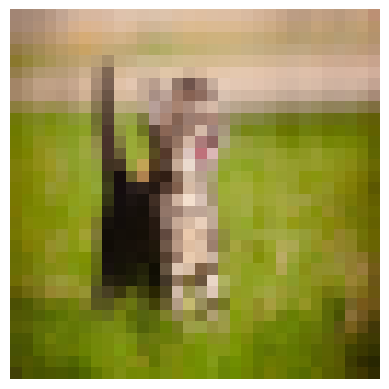

In [60]:
# Carrega uma imagem de um arquivo
image = Image.open("/content/drive/MyDrive/Colab Notebooks/Modelo-Cifar100/gatinho.jpg")
image = image.resize((32, 32))
image = np.array(image) / 255.0
image = np.expand_dims(image, axis=0)

# Coleta a class da previsão e coloca em um "printável"l
# Make subclass prediction using the trained model
subclass_predictions = subclass_model.predict(image)
predicted_subclass_index = np.argmax(subclass_predictions)
predicted_subclass_label = labels[predicted_subclass_index][0]

# Print the predicted subclass label
print("Previsão subclasse:", get_subclass_name(predicted_subclass_index))

# Make superclass prediction using the trained model
superclass_predictions = superclass_model.predict(image)
predicted_superclass_index = np.argmax(superclass_predictions)
predicted_superclass_label = predicted_superclass_index

# Print the predicted superclass label
print("Previsão superclasse:", predicted_superclass_label)

# Visualiza a imagem
plt.imshow(image[0])
plt.axis('off')
#plt.title(f"Previsão: {predicted_class_label}")
plt.show()